In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read in the CSV file and display the first few rows
df = pd.read_csv('NFLDraftHistory.csv')
print(df.head())

   season  round  pick team gsis_id pfr_player_id    cfb_player_id  \
0    1990      1     1  IND     NaN      GeorJe00    jeff-george-1   
1    1990      1     2  NYJ     NaN      ThomBl00   blair-thomas-1   
2    1990      1     3  SEA     NaN      KennCo00              NaN   
3    1990      1     4  TAM     NaN      McCaKe21  keith-mccants-1   
4    1990      1     5  SDG     NaN      SeauJu00    junior-seau-1   

  pfr_player_name    hof position  ... pass_ints rush_atts rush_yards  \
0     Jeff George  False       QB  ...     113.0     168.0      307.0   
1    Blair Thomas  False       RB  ...       0.0     533.0     2236.0   
2  Cortez Kennedy   True       DT  ...       0.0       0.0        0.0   
3   Keith McCants  False       DE  ...       0.0       0.0        0.0   
4     Junior Seau   True       LB  ...       0.0       0.0        0.0   

   rush_tds  receptions  rec_yards  rec_tds  def_solo_tackles  def_ints  \
0       2.0         0.0        0.0      0.0               NaN    

In [9]:
# Check column names and shape
print(df.columns.tolist())
df.shape

['season', 'round', 'pick', 'team', 'gsis_id', 'pfr_player_id', 'cfb_player_id', 'pfr_player_name', 'hof', 'position', 'category', 'side', 'college', 'age', 'to', 'allpro', 'probowls', 'seasons_started', 'w_av', 'car_av', 'dr_av', 'games', 'pass_completions', 'pass_attempts', 'pass_yards', 'pass_tds', 'pass_ints', 'rush_atts', 'rush_yards', 'rush_tds', 'receptions', 'rec_yards', 'rec_tds', 'def_solo_tackles', 'def_ints', 'def_sacks']


(8555, 36)

In [14]:
# Drop rows missing the key columns I will be using
df_clean = df.dropna(subset=['college', 'w_av', 'probowls', 'games'])

# Filter to only positions that are relevant for my analysis (so no kickers, punters, etc.)
valid_positions = ['QB', 'RB', 'WR', 'TE', 'C', 'G', 'T', 'DE', 'DT', 'LB', 'CB', 'S']
df_clean = df_clean[df_clean['position'].isin(valid_positions)]

# Focus only on drafts from 2012 and earlier
df_clean = df_clean[df_clean['season'] <= 2012]

# Reset index
df_clean = df_clean.reset_index(drop=True)

# Quick summary
print(df_clean[['college', 'w_av', 'probowls', 'games']].describe(include='all'))
print(f"Cleaned shape: {df_clean.shape}")

           college         w_av     probowls        games
count         3937  3937.000000  3937.000000  3937.000000
unique         295          NaN          NaN          NaN
top     Miami (FL)          NaN          NaN          NaN
freq           100          NaN          NaN          NaN
mean           NaN    21.037084     0.420879    72.218186
std            NaN    25.388909     1.425808    57.186152
min            NaN    -4.000000     0.000000     0.000000
25%            NaN     2.000000     0.000000    22.000000
50%            NaN    11.000000     0.000000    61.000000
75%            NaN    33.000000     0.000000   113.000000
max            NaN   184.000000    15.000000   335.000000
Cleaned shape: (3937, 36)


In [39]:
# Count how many players were drafted from each college
college_counts = df_clean['college'].value_counts()
# Filter to only include colleges with at least 10 players drafted
valid_colleges = college_counts[college_counts >= 10].index
# Create a new DataFrame with only the valid colleges
df_filtered = df_clean[df_clean['college'].isin(valid_colleges)]

In [40]:
# Group by college and calculate average career stats
college_avg = df_filtered.groupby('college')[['w_av', 'probowls', 'games']].mean().sort_values('w_av', ascending=False)
print(college_avg.head(10))

                   w_av  probowls      games
college                                     
Boston Col.   35.162162  0.918919  94.648649
Georgia       30.380282  0.704225  85.098592
Marshall      29.785714  0.500000  94.571429
Purdue        29.487179  0.769231  92.589744
Memphis       29.461538  0.615385  93.230769
California    29.423729  0.932203  86.254237
Mississippi   29.055556  0.583333  95.250000
Oklahoma St.  28.157895  0.789474  92.315789
Auburn        27.981818  0.454545  89.854545
Miami (FL)    27.980000  0.950000  80.660000


In [41]:
# Group by college and calculate total career stats
college_total = df_filtered.groupby('college')[['w_av', 'probowls', 'games']].sum().sort_values('w_av', ascending=False)
print(college_total.head(10))

               w_av  probowls   games
college                              
Miami (FL)   2798.0        95  8066.0
USC          2236.0        63  7074.0
Georgia      2157.0        50  6042.0
Florida St.  2109.0        48  6658.0
Tennessee    2081.0        48  6812.0
Michigan     2014.0        37  6401.0
Florida      1990.0        30  6358.0
Ohio St.     1846.0        33  6131.0
California   1736.0        55  5089.0
Notre Dame   1673.0        23  6322.0


/var/folders/sc/h52fjgnn4fs2lk67k15s12m40000gn/T/ipykernel_50417/1564239621.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg, x='w_av', y='college', palette='dark')


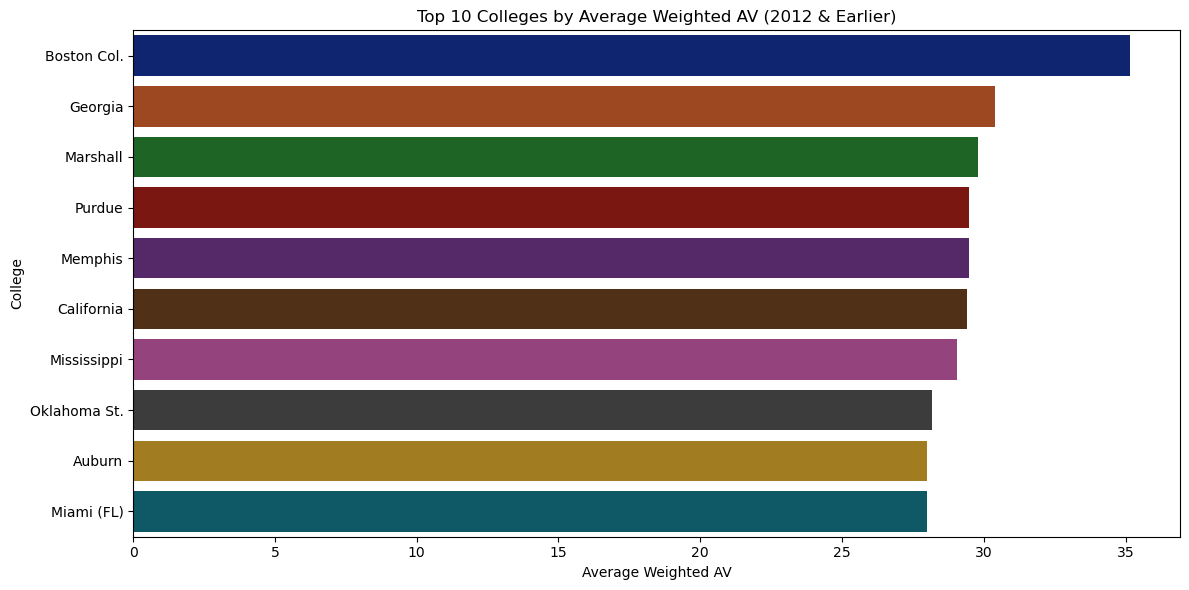

In [ ]:
# Plot quality (average performance)
top_avg = college_avg.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_avg, x='w_av', y='college', palette='dark')
plt.title('Top 10 Colleges by Average Weighted AV (2012 & Earlier)')
plt.xlabel('Average Weighted AV')
plt.ylabel('College')
plt.tight_layout()
plt.show()

/var/folders/sc/h52fjgnn4fs2lk67k15s12m40000gn/T/ipykernel_50417/2063096885.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_total, x='w_av', y='college', palette='bright')


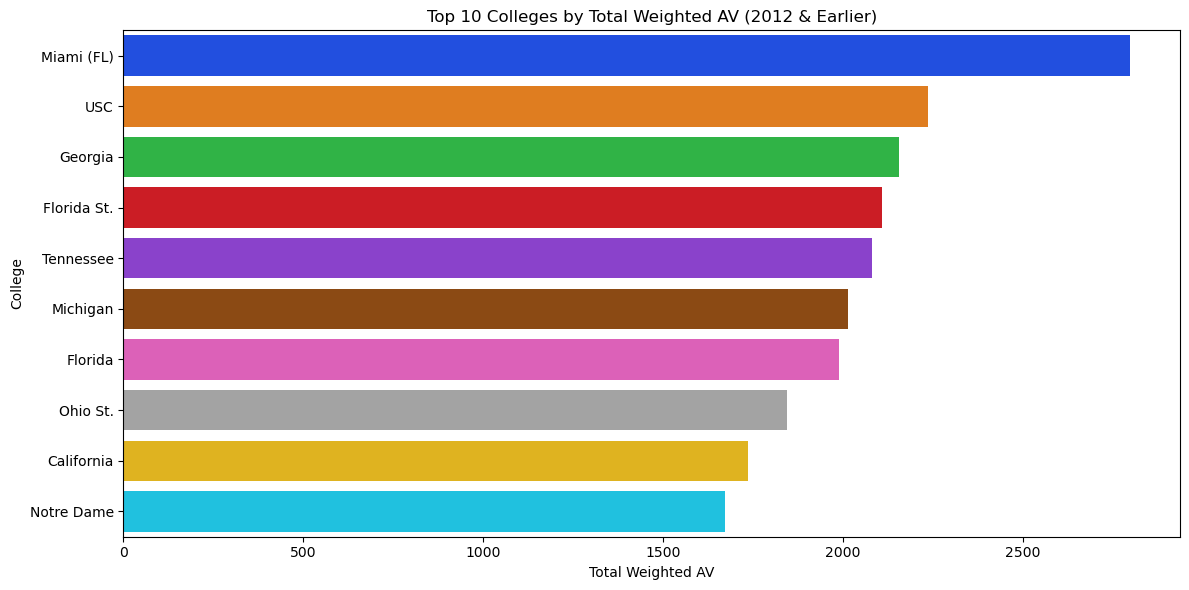

In [ ]:
# Plot quantity (total production)
top_total = college_total.head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_total, x='w_av', y='college', palette='bright')
plt.title('Top 10 Colleges by Total Weighted AV (2012 & Earlier)')
plt.xlabel('Total Weighted AV')
plt.ylabel('College')
plt.tight_layout()
plt.show()

/var/folders/sc/h52fjgnn4fs2lk67k15s12m40000gn/T/ipykernel_50417/3467252007.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pb, x='probowls', y='college', palette='pastel')


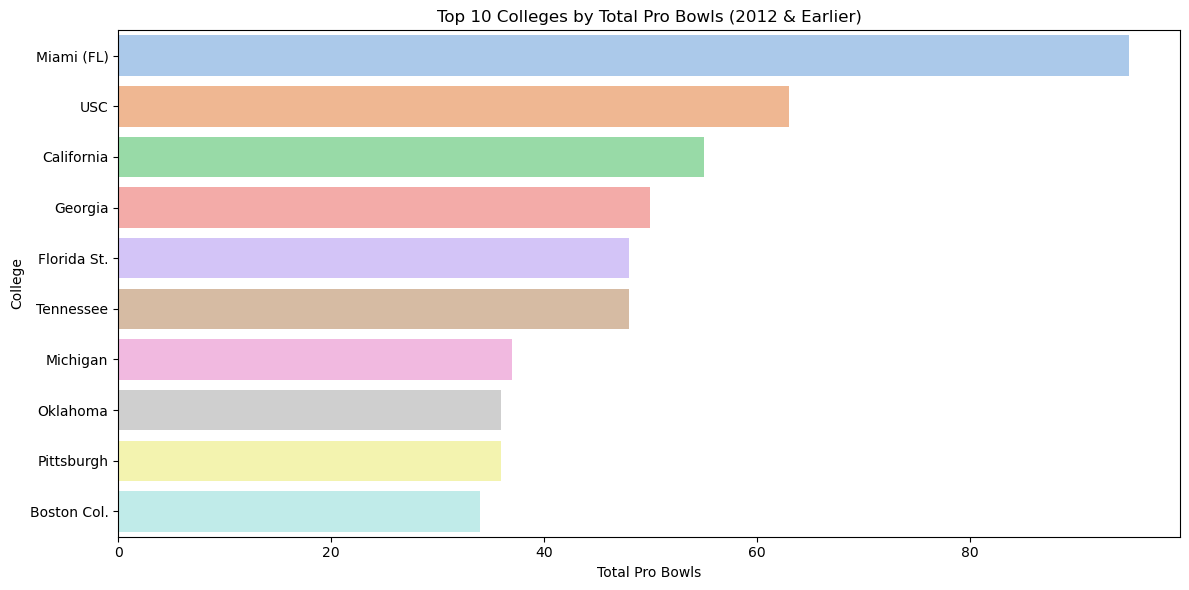

In [56]:
# Plot Pro Bowls (star power)
top_pb = college_total.sort_values('probowls', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_pb, x='probowls', y='college', palette='pastel')
plt.title('Top 10 Colleges by Total Pro Bowls (2012 & Earlier)')
plt.xlabel('Total Pro Bowls')
plt.ylabel('College')
plt.tight_layout()
plt.show()

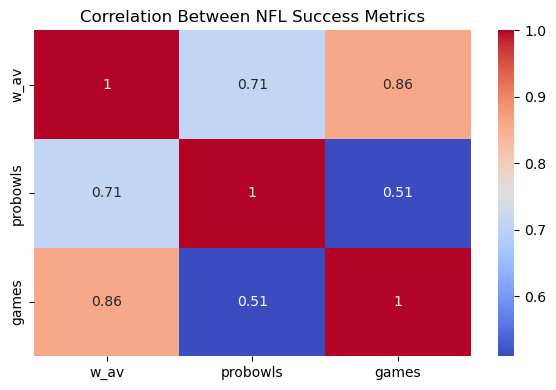

In [57]:
# Create a heatmap to visualize the correlation between the metrics
metrics = df_filtered[['w_av', 'probowls', 'games']]
plt.figure(figsize=(6, 4))
sns.heatmap(metrics.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between NFL Success Metrics')
plt.tight_layout()
plt.show()

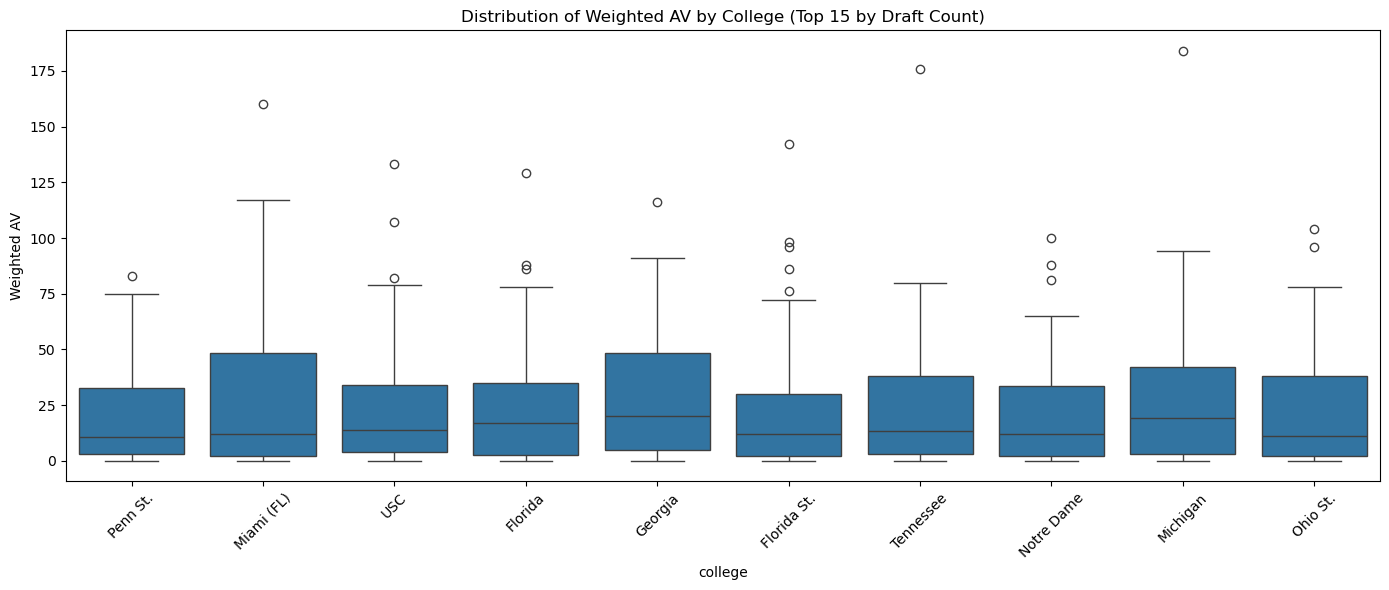

In [59]:
# Plot for distribution (outliers)
top_colleges = df_filtered['college'].value_counts().head(10).index
top_data = df_filtered[df_filtered['college'].isin(top_colleges)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=top_data, x='college', y='w_av')
plt.xticks(rotation=45)
plt.title('Distribution of Weighted AV by College (Top 15 by Draft Count)')
plt.ylabel('Weighted AV')
plt.tight_layout()
plt.show()